In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df= pd.read_csv('Student_Performance.csv')

In [3]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [5]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

#EDA

<ipython-input-8-8e8670d6c5b2>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, i+1)


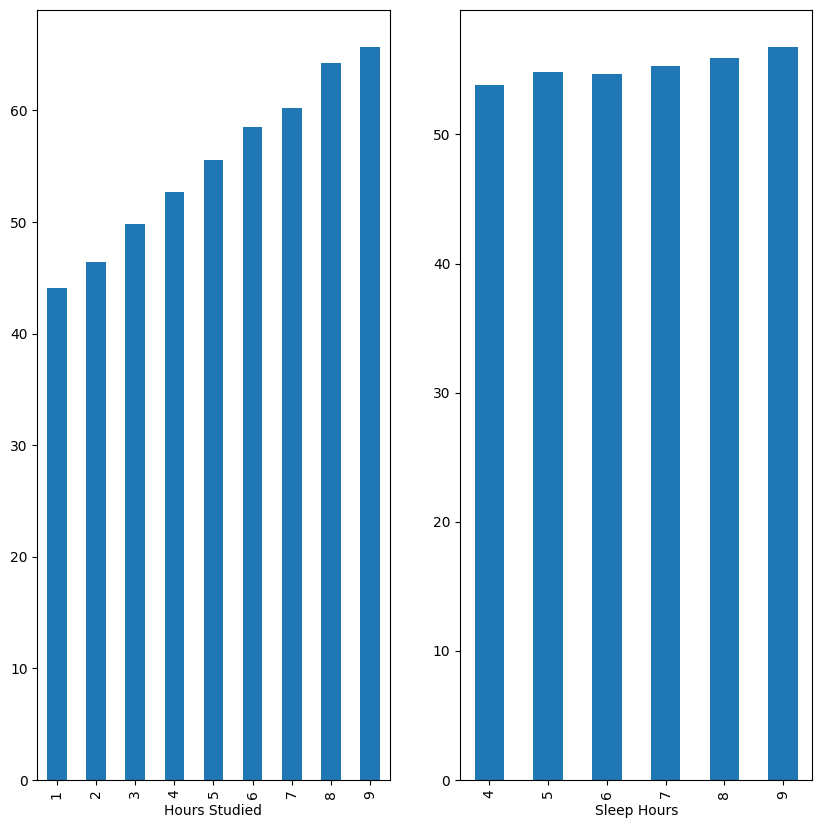

In [8]:
features = {'Hours Studied', 'Sleep Hours'}
plt.subplots(figsize=(10, 10))

for i, col in enumerate(features):
    plt.subplot(1, 2, i+1)
    df.groupby(col)['Performance Index'].mean().plot.bar()
plt.show()


<ipython-input-10-b4b3a569391b>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, i+1)


<function matplotlib.pyplot.show(close=None, block=None)>

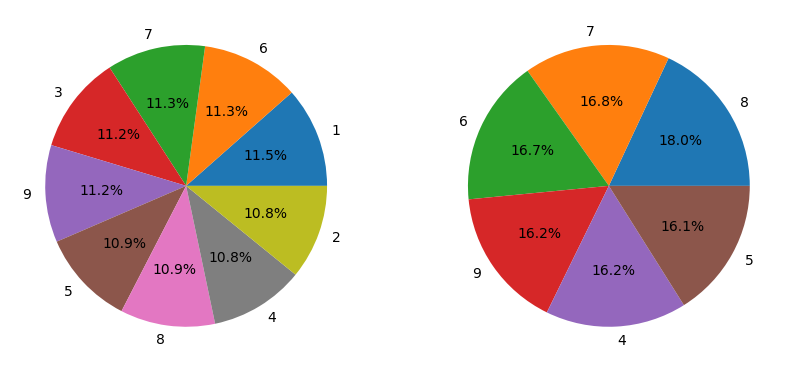

In [10]:
features = {'Hours Studied', 'Sleep Hours'}
plt.subplots(figsize=(10, 10))

for i, col in enumerate(features):
    plt.subplot(1, 2, i+1)
    x= df[col].value_counts()
    plt.pie(x.values, labels= x.index, autopct='%1.1f%%')

plt.show

#OutlierChecking

<Axes: ylabel='Hours Studied'>

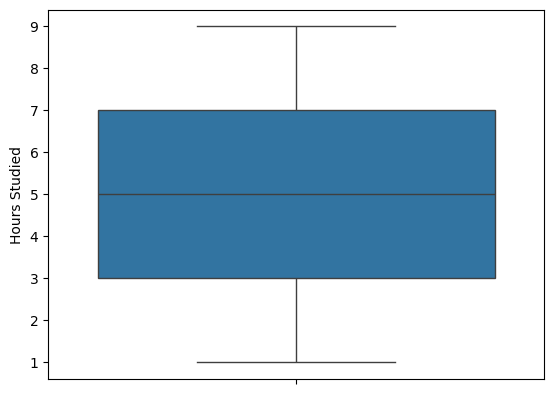

In [11]:
sns.boxplot(df['Hours Studied'])

<Axes: ylabel='Previous Scores'>

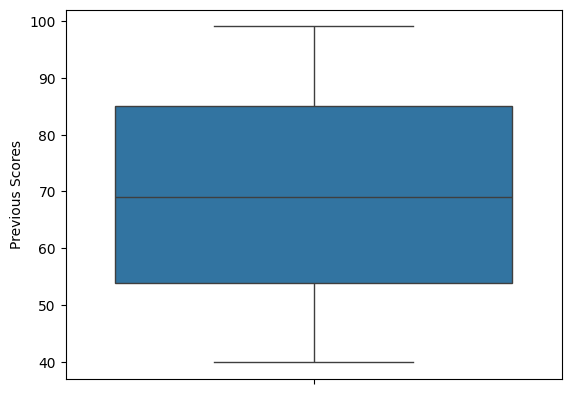

In [13]:
sns.boxplot(df['Previous Scores'])

#Encoding

In [14]:
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No' :0})

In [15]:
df['Extracurricular Activities'].head()

0    1
1    0
2    1
3    1
4    0
Name: Extracurricular Activities, dtype: int64

In [16]:
X= df.iloc[:, :-1]
Y= df.iloc[:, -1]

In [17]:
print(X)

      Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0                 7               99                           1            9   
1                 4               82                           0            4   
2                 8               51                           1            7   
3                 5               52                           1            5   
4                 7               75                           0            8   
...             ...              ...                         ...          ...   
9995              1               49                           1            4   
9996              7               64                           1            8   
9997              6               83                           1            8   
9998              9               97                           1            7   
9999              7               74                           0            8   

      Sample Question Paper

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

#Model

#Multiple Linear

In [20]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [21]:
y1_pred= lr.predict(X_test)

In [22]:
from sklearn.metrics import r2_score
r2_score(Y_test, y1_pred)

0.9880686410711422

In [48]:
lr.predict([[7,99, 0, 7, 4]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([90.84486814])

#plolynomial

In [26]:
from sklearn.preprocessing import PolynomialFeatures
pow = PolynomialFeatures(degree = 3)
X_train_new= pow.fit_transform(X_train)
X_test_new= pow.fit_transform(X_test)
lr2= LinearRegression()
lr2.fit(X_train_new, Y_train)

LinearRegression()

In [27]:
y2_pred = lr2.predict(X_test_new)

In [28]:
r2_score(Y_test, y2_pred)

0.9879335671739772

In [55]:
new_data = pd.DataFrame([[7,99, 0, 7, 4]])
new_data_poly = pow.fit_transform(new_data)
lr2.predict(new_data_poly)

array([90.79859803])

#decisionTree_Regression

In [29]:
from sklearn.tree import DecisionTreeRegressor
dt= DecisionTreeRegressor()
dt.fit(X_train, Y_train)

DecisionTreeRegressor()

In [30]:
y3_pred = dt.predict(X_test)

In [31]:
r2_score(Y_test, y3_pred)

0.9735698829007458

In [50]:
dt.predict([[7,99, 0, 7, 4]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([89.])

#randomForestREGRESSION

In [32]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor()
rf.fit(X_train, Y_train)

RandomForestRegressor()

In [33]:
y4_pred= rf.predict(X_test)

In [34]:
r2_score(Y_test, y4_pred)

0.9841878805348131

In [51]:
rf.predict([[7,99, 0, 7, 4]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([90.51])

#SVR without scalling

In [40]:
from sklearn.svm import SVR
svr= SVR()
svr.fit(X_train, Y_train)

SVR()

In [41]:
y5_pred= svr.predict(X_test)

In [42]:
r2_score(Y_test, y5_pred)

0.9844205065521452

In [56]:
svr.predict([[7,99, 0, 7, 4]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


array([88.29771486])

#with scalling

In [38]:
from sklearn.preprocessing import StandardScaler
scx= StandardScaler()
scy= StandardScaler()
X_train_sc= scx.fit_transform(X_train)
X_test_sc= scx.fit_transform(X_test)
Y_train_sc= scy.fit_transform(Y_train.values.reshape(-1,1))

In [43]:
from sklearn.svm import SVR
svr2= SVR()
svr2.fit(X_train_sc, Y_train_sc)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [44]:
y6_pred = scy.inverse_transform (svr2.predict(X_test_sc).reshape(-1,1))

In [45]:
r2_score(Y_test, y6_pred)

0.9850446255966774